In [1]:
import numpy as np
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()
from datetime import datetime

## Example of Metrics Calculation

### User Activity

In [2]:
data = pd.read_csv('activity_pretest.csv')

In [3]:
data.head()

,userid,dt,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,0


In [4]:
data.activity_level.value_counts().sort_values(ascending=False)

0     909125
5      49227
2      49074
18     48982
10     48943
16     48934
12     48911
6      48901
19     48901
11     48832
9      48820
1      48732
3      48659
14     48620
15     48599
4      48556
13     48534
8      48396
17     48395
7      48339
20     24520
Name: activity_level, dtype: int64

In [5]:
data.groupby('activity_level').describe().head()

userid                                                    \
                 count unique                                   top freq   
activity_level                                                             
0               909125  60000  6b953416-72e5-4b6e-b634-41c8d3bf98a4   27   
1                48732  33688  3c5297b6-602e-4479-9a97-e2b4cb444f0a    6   
2                49074  33761  3d5b7e5d-d7b8-459b-a4f0-33231fc930fd    6   
3                48659  33634  fd9d8064-2f3f-47ba-9deb-0a38bc0b1a3d    6   
4                48556  33502  dc396a83-174c-4244-8a33-71eae2283eeb    8   

                    dt                            
                 count unique         top   freq  
activity_level                                    
0               909125     31  2021-10-11  29511  
1                48732     31  2021-10-19   1620  
2                49074     31  2021-10-14   1665  
3                48659     31  2021-10-28   1663  
4                48556     31  2021-10-29   1632

In [7]:
activity = data.query('activity_level>0').groupby(['dt', 'activity_level']).count().reset_index()
activity

,dt,activity_level,userid
0,2021-10-01,1,1602
1,2021-10-01,2,1507
2,2021-10-01,3,1587
3,2021-10-01,4,1551
4,2021-10-01,5,1586
...,...,...,...
615,2021-10-31,16,1499
616,2021-10-31,17,1534
617,2021-10-31,18,1531
618,2021-10-31,19,1616


### Plot the activity

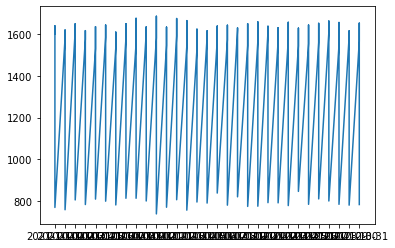

In [13]:
import matplotlib.pyplot as plt

x = activity['dt']
y = activity['userid']

plt.plot(x,y)
plt.show()

In [16]:
alt.Chart(activity).mark_line(size=1).encode(
    alt.X('dt:T', axis=alt.Axis(title='date')),
    alt.Y('userid:Q', axis=alt.Axis(title='number of users')),
    tooltip=['activity_level'],
    color='activity_level:N'
).properties(width=600, height=400)

alt.Chart(...)

####

### Calculating Daily Active Users

In this dataset, a userid will count towards DAU if their activity_level for that day is not zero.

In [32]:
dau = data.query('activity_level>0').groupby('dt').count().reset_index()
dau = dau.drop(['activity_level'], axis=1)
dau.head

<bound method NDFrame.head of             dt  userid
0   2021-10-01   30634
1   2021-10-02   30775
2   2021-10-03   30785
3   2021-10-04   30599
4   2021-10-05   30588
5   2021-10-06   30639
6   2021-10-07   30637
7   2021-10-08   30600
8   2021-10-09   30902
9   2021-10-10   30581
10  2021-10-11   30489
11  2021-10-12   30715
12  2021-10-13   30761
13  2021-10-14   30716
14  2021-10-15   30637
15  2021-10-16   30708
16  2021-10-17   30741
17  2021-10-18   30694
18  2021-10-19   30587
19  2021-10-20   30795
20  2021-10-21   30705
21  2021-10-22   30573
22  2021-10-23   30645
23  2021-10-24   30815
24  2021-10-25   30616
25  2021-10-26   30673
26  2021-10-27   30661
27  2021-10-28   30734
28  2021-10-29   30723
29  2021-10-30   30628
30  2021-10-31   30519>

### Plot the DAU

In [28]:
alt.Chart(dau).mark_line(size=4).encode(
    alt.X('dt:T', axis=alt.Axis(title='date')),
    alt.Y('userid:Q', axis=alt.Axis(title='umber of unsers')),
).properties(width=600, height=400, title='Daily User Activity')

alt.Chart(...)

### Click-through rate

In [30]:
data_ctr = pd.read_csv('ctr_pretest.csv')
data_ctr.head()

,userid,dt,ctr
0,4b328144-df4b-47b1-a804-09834942dce0,2021-10-01,34.28
1,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,34.67
2,8028cccf-19c3-4c0e-b5b2-e707e15d2d83,2021-10-01,34.77
3,652b3c9c-5e29-4bf0-9373-924687b1567e,2021-10-01,35.42
4,45b57434-4666-4b57-9798-35489dc1092a,2021-10-01,35.04


In [33]:
ctr = data_ctr.groupby('dt').mean().reset_index()
ctr

,dt,ctr
0,2021-10-01,32.993446
1,2021-10-02,32.991664
2,2021-10-03,32.995086
3,2021-10-04,32.992995
4,2021-10-05,33.004375
5,2021-10-06,33.018564
6,2021-10-07,32.988500
7,2021-10-08,32.998654
8,2021-10-09,33.005082
9,2021-10-10,33.007134


### Plot the CTR

In [36]:
alt.Chart(ctr).mark_line(size=4).encode(
    alt.X('dt:T', axis=alt.Axis(title='date')),
    alt.Y('ctr:Q', axis=alt.Axis(title='ctr'), scale=alt.Scale(domain=[32,34])),
    
).properties(width=600, height=400, title= 'Average Daily CTR')

alt.Chart(...)